# Data Science and Visualization Laboratory
## Assignment 2

* Build training and testing dataset of assignment 1 to predict the probability of a survival of a person based on gender, age and passenger-class.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df["Age"].isna().sum()

177

In [5]:
#fill missing Age values
df['Age']=df['Age'].interpolate()

In [6]:
df["Age"].isna().sum()

0

In [7]:
print("Percentage of females who survived: {:.2f} %".format(df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100))

print("Percentage of males who survived: {:.2f} %".format(df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100))

Percentage of females who survived: 74.20 %
Percentage of males who survived: 18.89 %


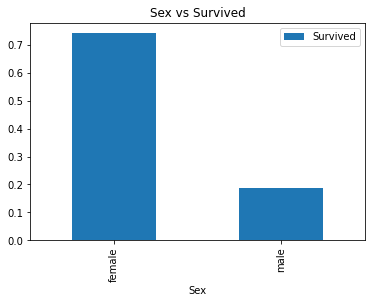

In [8]:
sex_pivot = df.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.title("Sex vs Survived")
plt.show()

In [9]:
print(sex_pivot)

        Survived
Sex             
female  0.742038
male    0.188908


We can see `74.20% female` and `18.89% male` survived.
Females are more likely to survive.

In [10]:
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

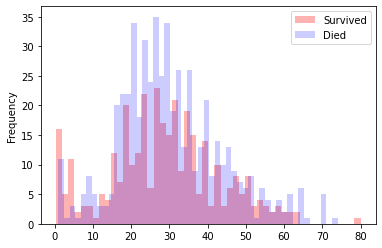

In [11]:
survived = df[df['Survived']==1]
died = df[df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.3,color='red',bins=50)
died["Age"].plot.hist(alpha=0.2,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived – where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

The pandas.cut() function has two required parameters – the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we need to remember to handle the missing values we observed above.

We’ll create a function that:

Uses the pandas.fillna() method to fill all of the missing values with -0.5

Cuts the Age column into six segments:

Missing, from -1 to 0

Infant, from 0 to 5

Child, from 5 to 12

Teenager, from 12 to 18

Young Adult, from 18 to 35

Adult, from 35 to 60

Senior, from 60 to 100

In [12]:
def process_age(df1,cut_points,label_names):
    df1["Age"] = df1["Age"].fillna(-0.5)
    df1["Age_categories"] = pd.cut(df1["Age"],cut_points,labels=label_names)
    return df1

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
df = process_age(df,cut_points,label_names)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


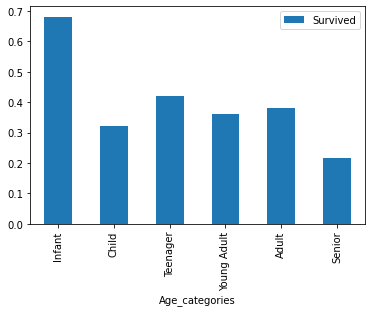

In [13]:
pivot = df.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

Infant(Age 0 to 5) are more likely to survive.

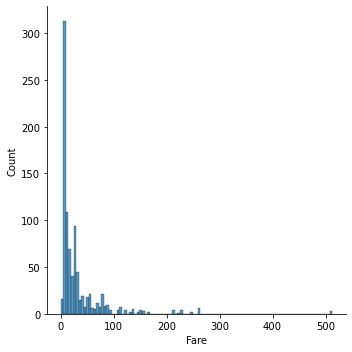

In [14]:
sns.displot(df['Fare']);

Percentage of Pclass = 1 who survived: 62.96%
Percentage of Pclass = 2 who survived: 47.28%
Percentage of Pclass = 3 who survived: 24.24%


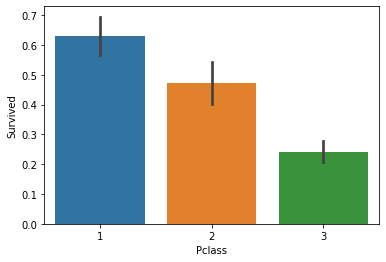

In [38]:
sns.barplot(x="Pclass", y="Survived", data=df)

print("Percentage of Pclass = 1 who survived: {:.2f}%".format(df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 2 who survived: {:.2f}%".format(df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 3 who survived: {:.2f}%".format(df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100))

People of higher socioeconomic class are more likely to survive. `Pclass 1 had better chance of survival` 

Percentage of SibSp = 0 who survived: 34.54%
Percentage of SibSp = 1 who survived: 53.59%
Percentage of SibSp = 2 who survived: 46.43%


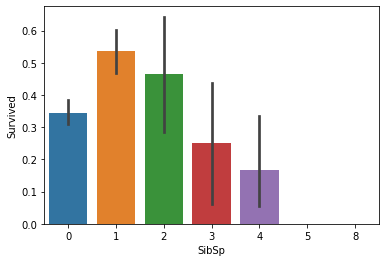

In [39]:
sns.barplot(x="SibSp", y="Survived", data=df)

print("Percentage of SibSp = 0 who survived: {:.2f}%".format(df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100))

print("Percentage of SibSp = 1 who survived: {:.2f}%".format(df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100))

print("Percentage of SibSp = 2 who survived: {:.2f}%".format(df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100))


`People with no siblings or spouses were less to likely to survive than those with one or two.`

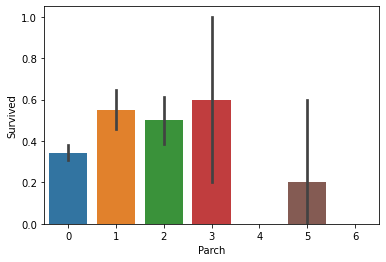

In [17]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

`
People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.
`

In [18]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn’t “worth” double what class 1 is, and class 3 isn’t “worth” triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass.

Rather than doing this manually, we can use the pandas.get_dummies() function which will generate columns shown in the diagram above.

We’ll create a function to create the dummy columns for the Pclass column and add it back to the original dataframe. We’ll then apply that function on the train and test dataframes for each of the Pclass, Sex, and Age_categories columns.

In [19]:
def create_dummies(df1,column_name):
    dummies = pd.get_dummies(df1[column_name],prefix=column_name)
    df1 = pd.concat([df1,dummies],axis=1)
    return df1

for column in ["Pclass","Sex","Age_categories"]:
    df = create_dummies(df,column)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'],
      dtype='object')

## Creating our first machine learning model
Now that our data has been prepared, we are ready to train our first model. The first model

we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

Instantiate (or create) the specific machine learning model you want to use

Fit the model to the training data

Use the model to make predictions

Evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       204 non-null    object  
 11  Embarked                    889 non-null    object  
 12  Age_categories              891 non-null    category
 13  Pclass_1            

In [22]:
Y = df['Survived']
X = df[['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']]

In [23]:
X.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,1,0,0


In [24]:
Y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [27]:
X_train.shape

(712, 12)

In [28]:
X_test.shape

(179, 12)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
column = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']

we use the LogisticRegression.fit() method to train our model. The .fit() method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

In [31]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [32]:
ypred = lr.predict(X_test)
ypred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [33]:
X_test

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
205,0,0,1,1,0,0,1,0,0,0,0,0
44,0,0,1,1,0,0,0,0,0,1,0,0
821,0,0,1,0,1,0,0,0,0,1,0,0
458,0,1,0,1,0,0,0,0,0,0,1,0
795,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,1,0,1,0,0,0,0,0,1,0,0
259,0,1,0,1,0,0,0,0,0,0,1,0
353,0,0,1,0,1,0,0,0,0,1,0,0
783,0,0,1,0,1,0,0,0,0,1,0,0


In [34]:
lr.predict_proba(X_test)

array([[0.11434093, 0.88565907],
       [0.43085094, 0.56914906],
       [0.91202168, 0.08797832],
       [0.25654238, 0.74345762],
       [0.82533733, 0.17466267],
       [0.54519468, 0.45480532],
       [0.91428057, 0.08571943],
       [0.53487198, 0.46512802],
       [0.08049207, 0.91950793],
       [0.43085094, 0.56914906],
       [0.08262565, 0.91737435],
       [0.91202168, 0.08797832],
       [0.75673114, 0.24326886],
       [0.53487198, 0.46512802],
       [0.4870622 , 0.5129378 ],
       [0.91202168, 0.08797832],
       [0.08049207, 0.91950793],
       [0.64551179, 0.35448821],
       [0.34662074, 0.65337926],
       [0.91202168, 0.08797832],
       [0.91202168, 0.08797832],
       [0.11736892, 0.88263108],
       [0.91202168, 0.08797832],
       [0.43085094, 0.56914906],
       [0.91202168, 0.08797832],
       [0.91202168, 0.08797832],
       [0.18510851, 0.81489149],
       [0.75143059, 0.24856941],
       [0.91202168, 0.08797832],
       [0.91202168, 0.08797832],
       [0.

In [35]:
type(X_test)

pandas.core.frame.DataFrame

In [36]:
lr.score(X_test,Y_test)

0.7988826815642458